<a href="https://colab.research.google.com/github/desaivishwas/D590_Project/blob/main/project_nb_woPlotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Cinema through Data

`The goal of this visualization is to analyze various aspects that contribute to the success of a film. A commercial picture can not only entertain the masses but also make a lot of money for the creators. A good director, excellent actors, production house, technicians such as editors/cinematographers, and the timing of the movie's release are all key factors in determining whether or not a film will make money. Indian cinema, one of the world’s oldest cinemas is a broad term that refers to a variety of film industries in India, which are mostly split by languages and regions. The Hindi film industry, popularly known as Bollywood, will be our primary emphasis. We hope to visually explore what makes a Bollywood film successful as well as provide a brief overview of Indian cinema with this project.`



In [9]:

import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import wordcloud
import datetime
from IPython.display import HTML
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default='colab'

In [10]:
movies = pd.read_csv('/content/bollywood_full.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4330 entries, 0 to 4329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           4330 non-null   object 
 1   imdb_id           4330 non-null   object 
 2   poster_path       3580 non-null   object 
 3   wiki_link         4330 non-null   object 
 4   title_y           4330 non-null   object 
 5   original_title    4330 non-null   object 
 6   is_adult          4330 non-null   int64  
 7   year_of_release   4330 non-null   object 
 8   runtime           4330 non-null   object 
 9   genres            4330 non-null   object 
 10  imdb_rating       4317 non-null   float64
 11  imdb_votes        4317 non-null   float64
 12  story             4065 non-null   object 
 13  summary           4329 non-null   object 
 14  tagline           685 non-null    object 
 15  actors            4320 non-null   object 
 16  wins_nominations  1344 non-null   object 


In [11]:
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [12]:
movies = movies.drop(columns=['poster_path', 'wiki_link', 'summary', 'tagline', 'title_x', 'title_y', 'story', 'release_date'])

In [13]:
movies = movies.rename(columns={"original_title":"title", "wins_nominations": "awards", "year_of_release":"year"})

In [14]:
# movies['year'] = movies['year'].replace(r'\r+|\n+|\t+','', regex=True)

In [15]:
# movies['year'].str.count('N').sum()
movies['year'] = movies['year'].replace('N','', regex=True)
movies = movies.replace(r'\\','', regex=True)
movies = movies.replace('N','', regex=True)

In [16]:
movies.head()

,imdb_id,title,is_adult,year,runtime,genres,imdb_rating,imdb_votes,actors,awards
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73.0,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN
2,tt6986710,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN
3,tt8108208,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN
4,tt6028796,Evening Shadows,0,2018,102,Drama,7.3,280.0,Mona Ambegaonkar|Ananth arayan Mahadevan|Devan...,17 wins & 1 nomination


## Checking for null values in the dataset

In [17]:
movies.isnull().sum()

imdb_id           0
title             0
is_adult          0
year              0
runtime           0
genres            0
imdb_rating      13
imdb_votes       13
actors           10
awards         2986
dtype: int64

### Replacing the null vlaues with 0

In [18]:
movies = movies.fillna(0)

In [19]:
# checking again for null values
movies.isnull().sum()

imdb_id        0
title          0
is_adult       0
year           0
runtime        0
genres         0
imdb_rating    0
imdb_votes     0
actors         0
awards         0
dtype: int64

In [20]:
 counts = movies['year'].value_counts().to_frame("counts")

In [21]:
counts = counts.rename_axis("year", axis="columns")
counts.sort_index().head()

year,counts
,2
1950,15
1951,17
1952,17
1953,18


Text(0, 0.5, '# of moviees released')

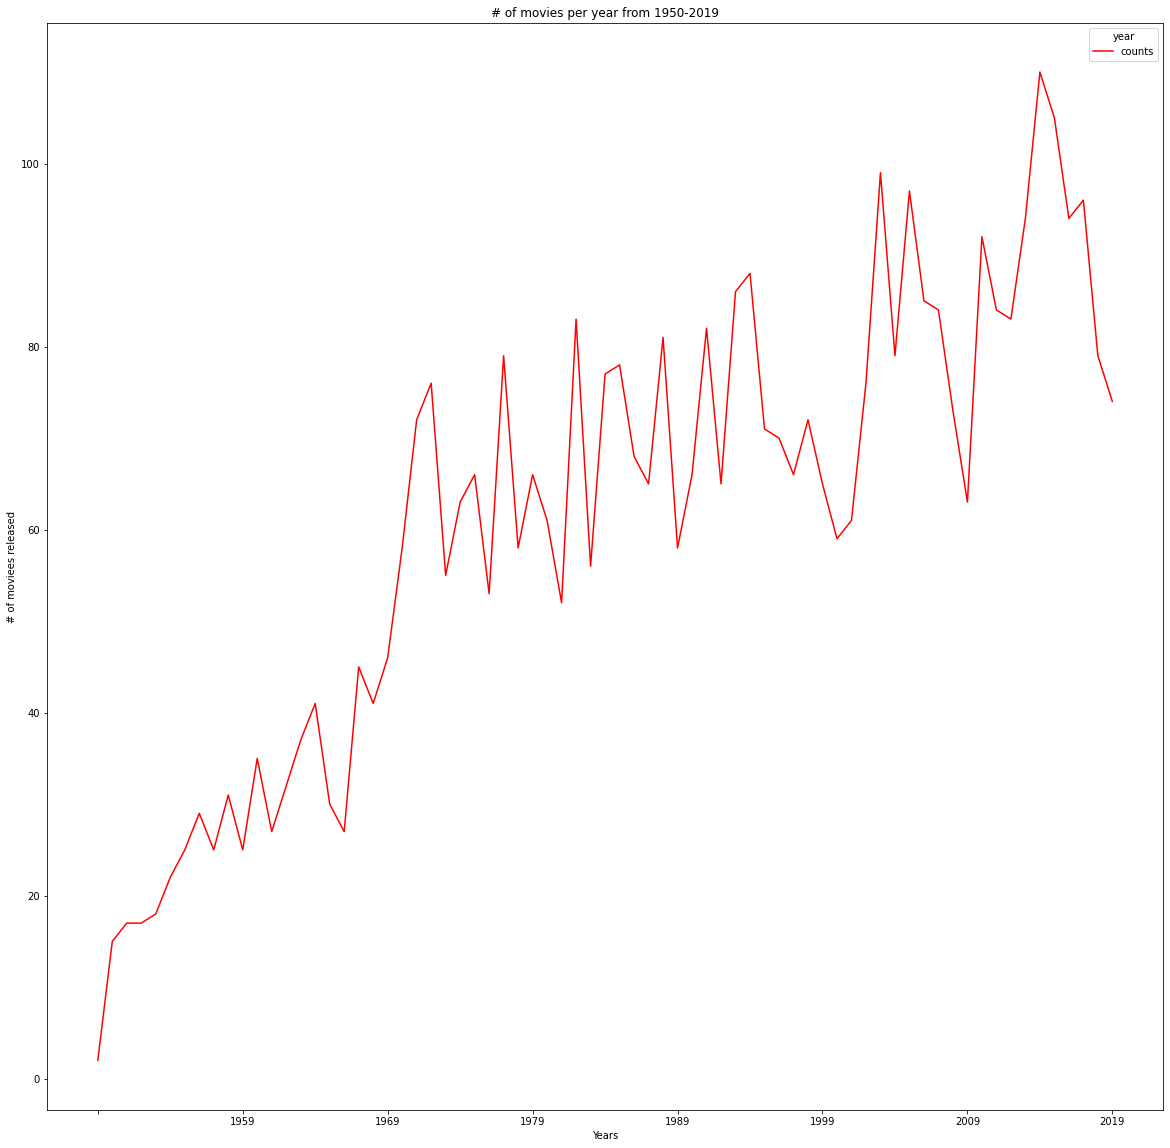

In [22]:
ax = counts.sort_index().plot(kind='line', figsize = (20, 20), title='# of movies per year from 1950-2019', c='red')
ax.set_xlabel("Years")
ax.set_ylabel("# of moviees released")

## WordCloud for movie genres

In [23]:
unique_genres = []
for i in range(len(movies)):
    genres = movies.at[i, 'genres']
    for genre in genres.split('|'):
        if genre not in unique_genres:
            unique_genres.append(genre)

In [24]:
movie_df = movies.copy()
total = len(movies)
for genre in unique_genres:
    movie_df[genre] = [0] * total

for i in range(len(movies)):
    genres = movie_df.at[i, 'genres']
    for genre in genres.split("|"):
        movie_df.at[i, genre] = 1

In [25]:
movie_df.head(2)

,imdb_id,title,is_adult,year,runtime,genres,imdb_rating,imdb_votes,actors,awards,Action,Drama,War,Biography,Crime,Comedy,Horror,Thriller,Music,Adventure,Mystery,Romance,Sport,History,Family,Fantasy,Documentary,Short,Sci-Fi,Musical,Animation,,Western
0,tt8291224,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt9472208,Battalion 609,0,2019,131,War,4.1,73.0,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


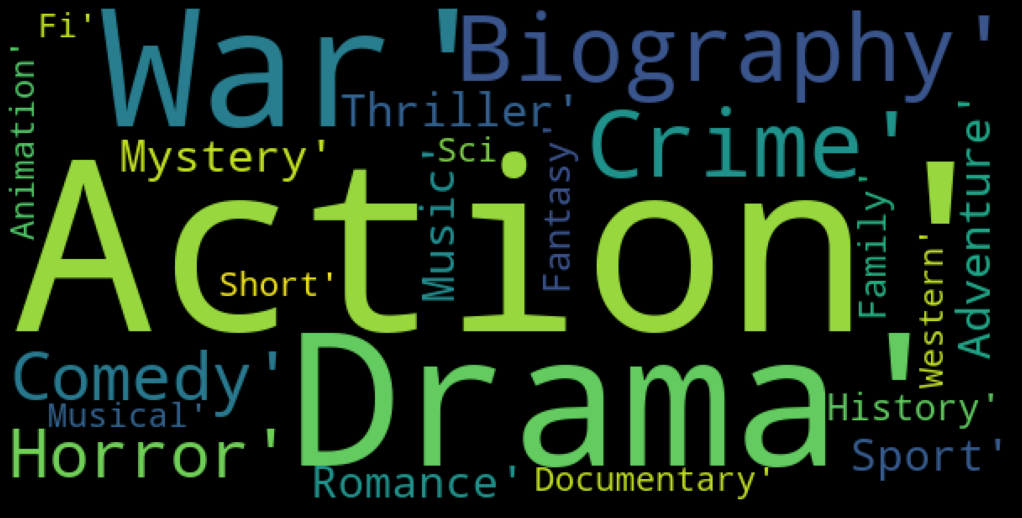

In [26]:
from wordcloud import WordCloud

# plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='black', width=600, height=300, max_font_size=150, 
                      max_words=200).generate(str(unique_genres))
wordcloud.recolor(random_state=0)
plt.figure(figsize = (14, 10),facecolor='k')
# plt.title("Wordcloud for gneres", fontsize=30)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Conclusion

## Top 25 highest rated movies in the data

In [27]:
ratings_df = movies.sort_values(by= 'imdb_rating', ascending=False)

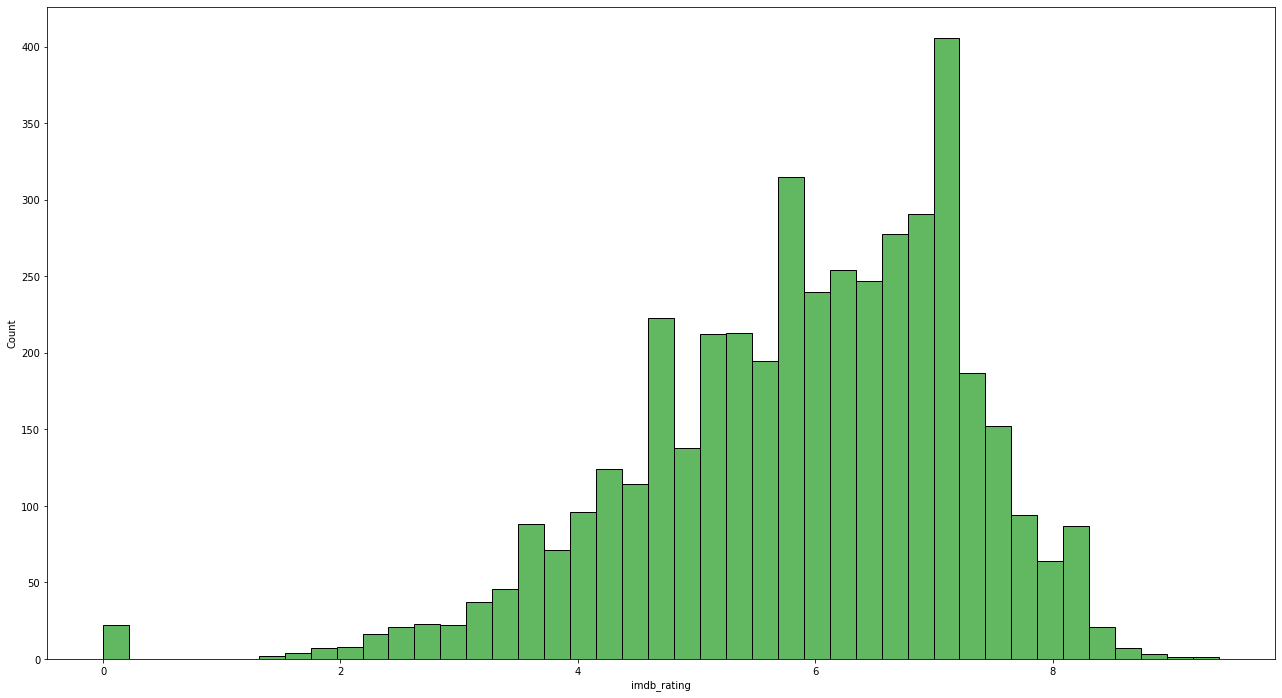

In [28]:
plt.figure(figsize=(22,12))
sns.histplot(data=ratings_df, x='imdb_rating', color='C2')

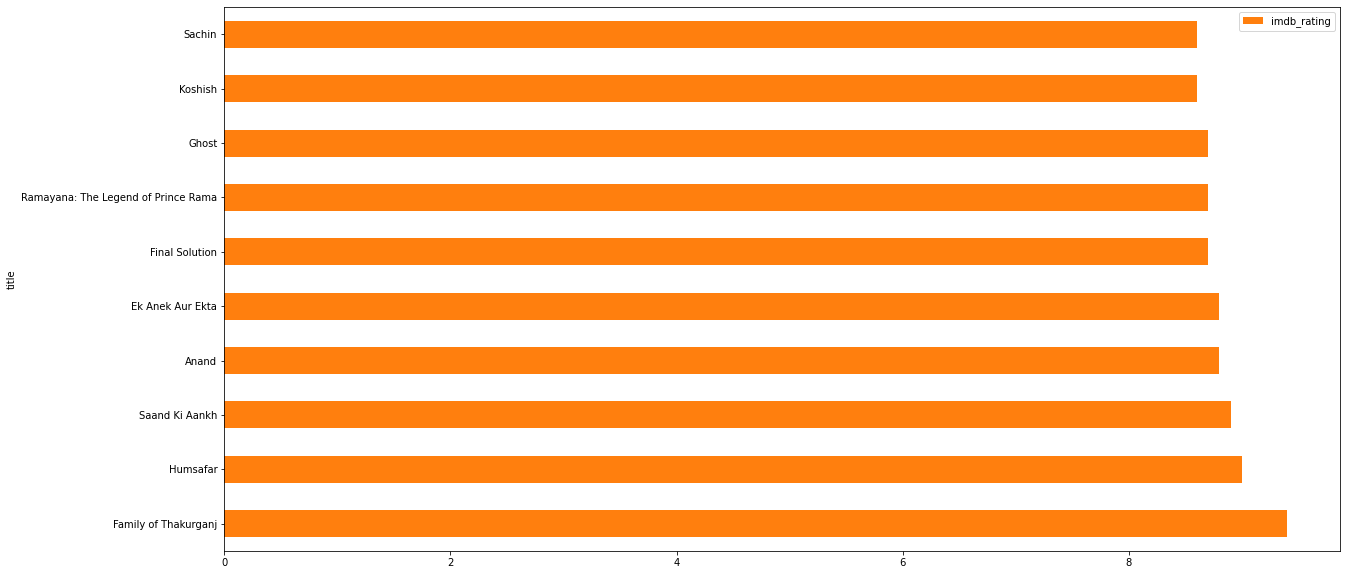

In [29]:
top10_df = ratings_df[:10]
top10_df.plot(x="title", y="imdb_rating", kind="barh", figsize=(20, 10), color='C1')

In [30]:
runtime_df = movies.copy()
runtime_df['runtime'] = pd.to_numeric(runtime_df['runtime'], errors='raise')
# runtime_df = movies.sort_values('runtime', ascending=False)

In [31]:
runtime_df = runtime_df.drop_duplicates()

In [32]:
runtime_df = runtime_df.sort_values('runtime', ascending=False)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


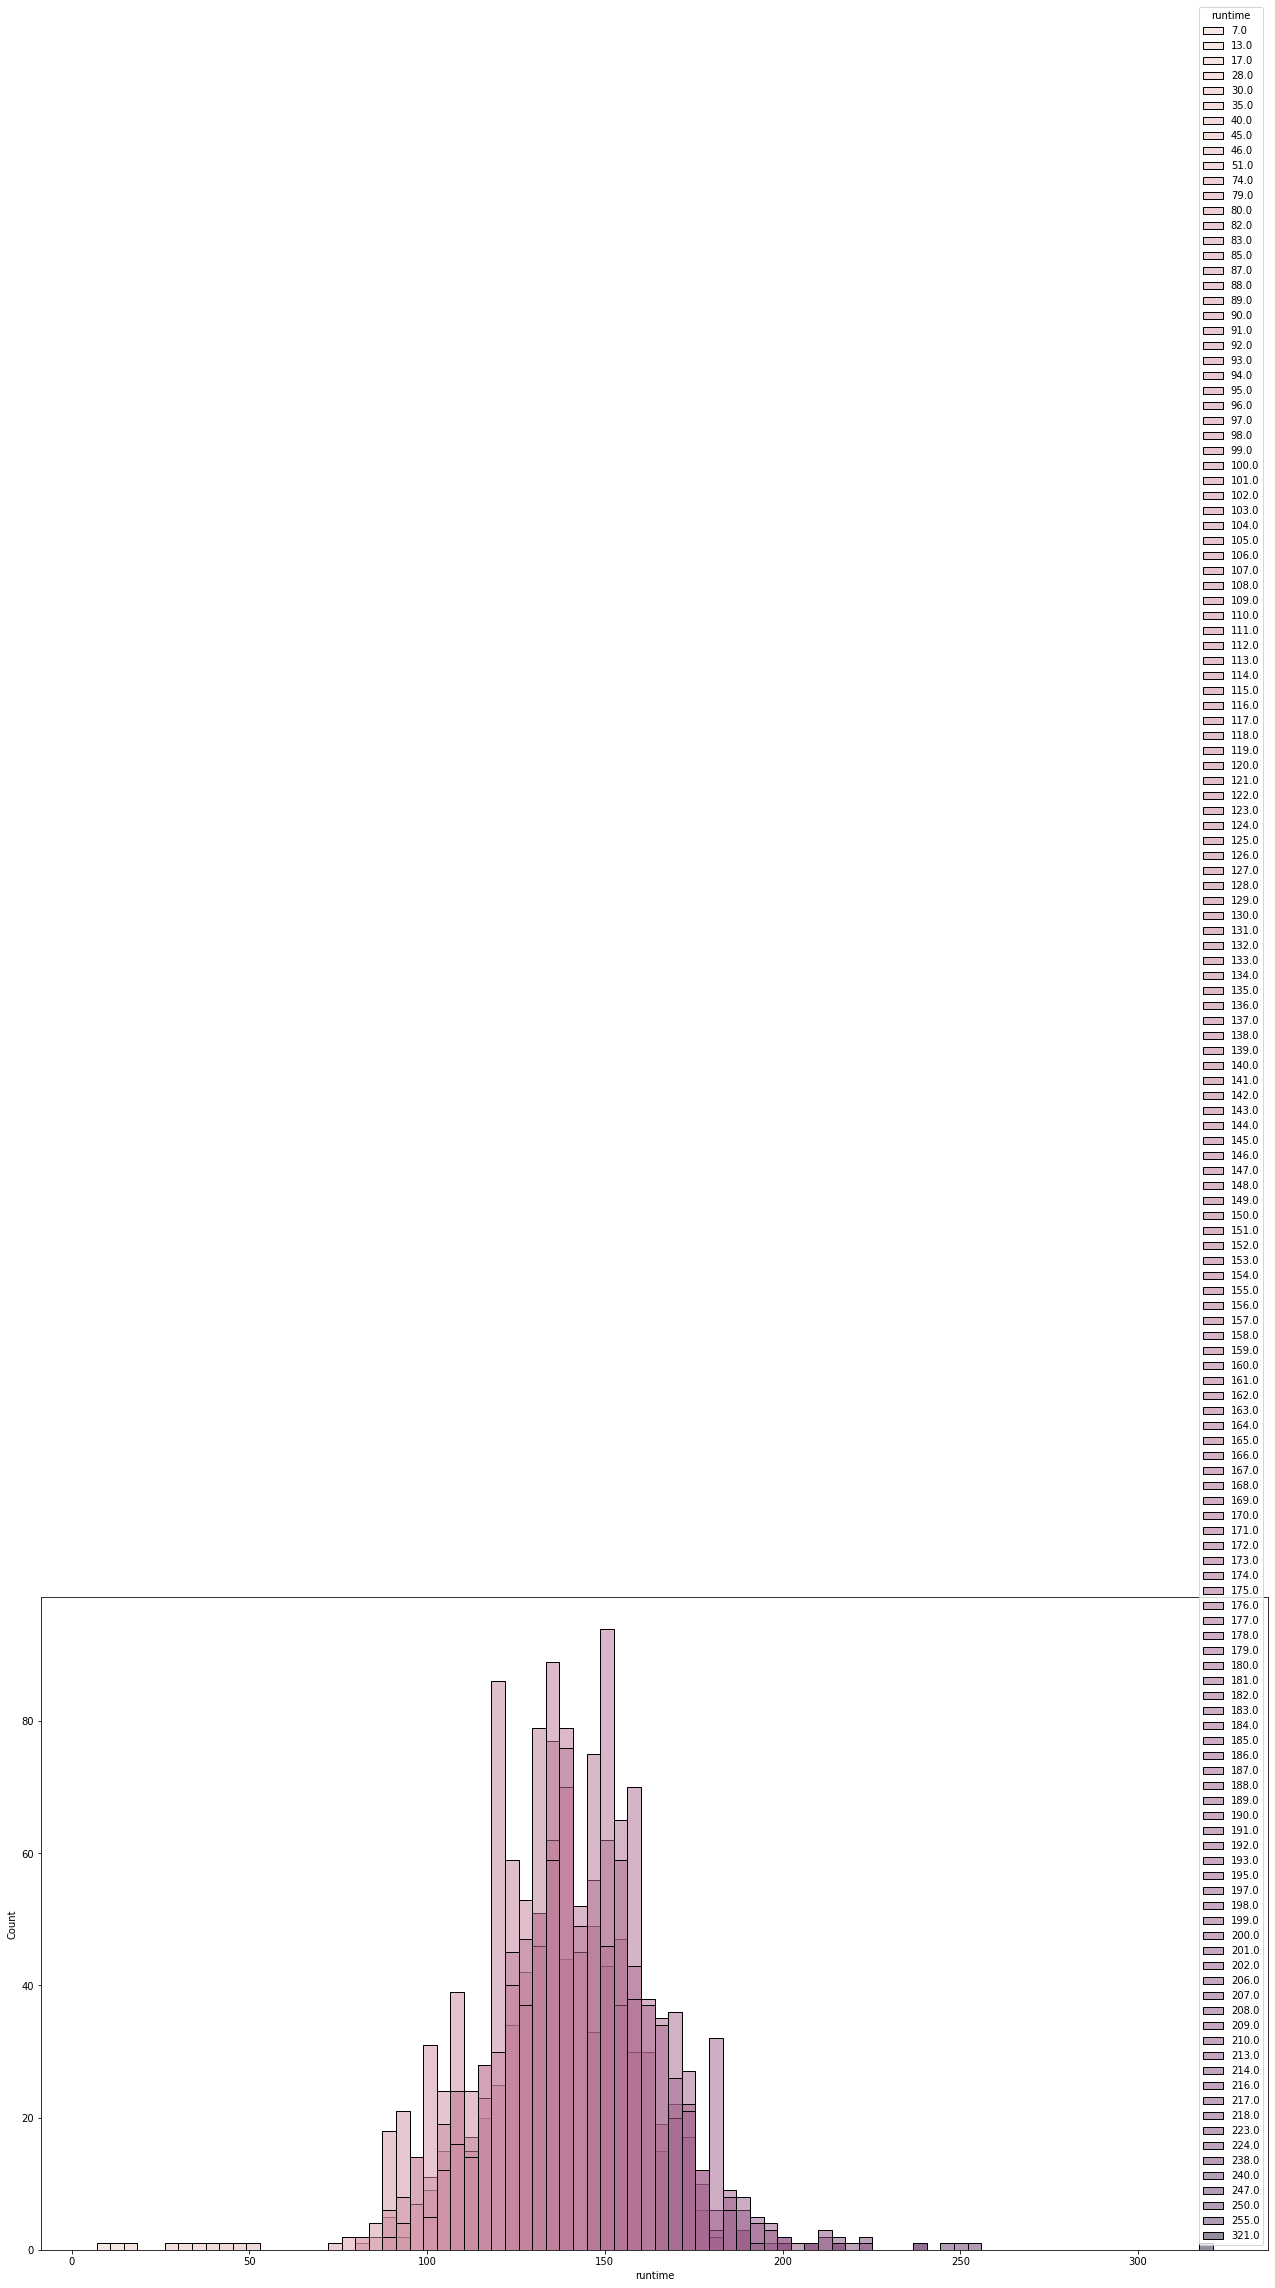

In [33]:
# ax =runtime_df['runtime'].histplot(kind='hist',bins=10)
plt.figure(figsize=(22,12))
sns.histplot(data=runtime_df, x='runtime', hue="runtime")

In [36]:

top10_runtime = runtime_df[:10]
# plt.figure(figsize=(22,12))
# sns.barplot(x="title", y="runtime",data= top10_runtime, palette="Blues_d",hue="runtime")



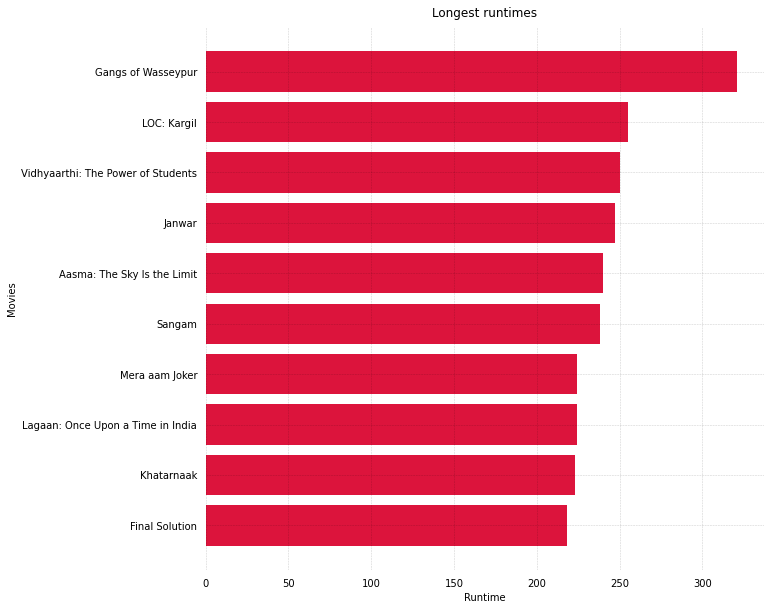

In [37]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,10))

# Horizontal Bar Plot
ax.barh(width = top10_runtime.runtime,y= top10_runtime.title, color='crimson')

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)

# Add x,y gridlines
ax.grid(b=True, color='black', linestyle='--', linewidth=0.5, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# x and y labels
plt.xlabel("Runtime")
plt.ylabel("Movies")

# Add Plot Title
ax.set_title('Longest runtimes', pad=10)
plt.show()

In [38]:
fig.show()

### Coclusion

## Failed experiment
Write About imdb api - bufge / boxoffice

## Looking for other sources of data

### About the dataset

## Bollywood Box Office (2017-2020) from kagagle


#### notes: Bias will be there, less date, does not give a compelt picture, improvemnts, etc
## maybe conver INR to dollar for safety

In [39]:
data = pd.read_csv('/content/bollywood_box_clean.csv')
data.head(3)

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.5,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.0,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.5,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...


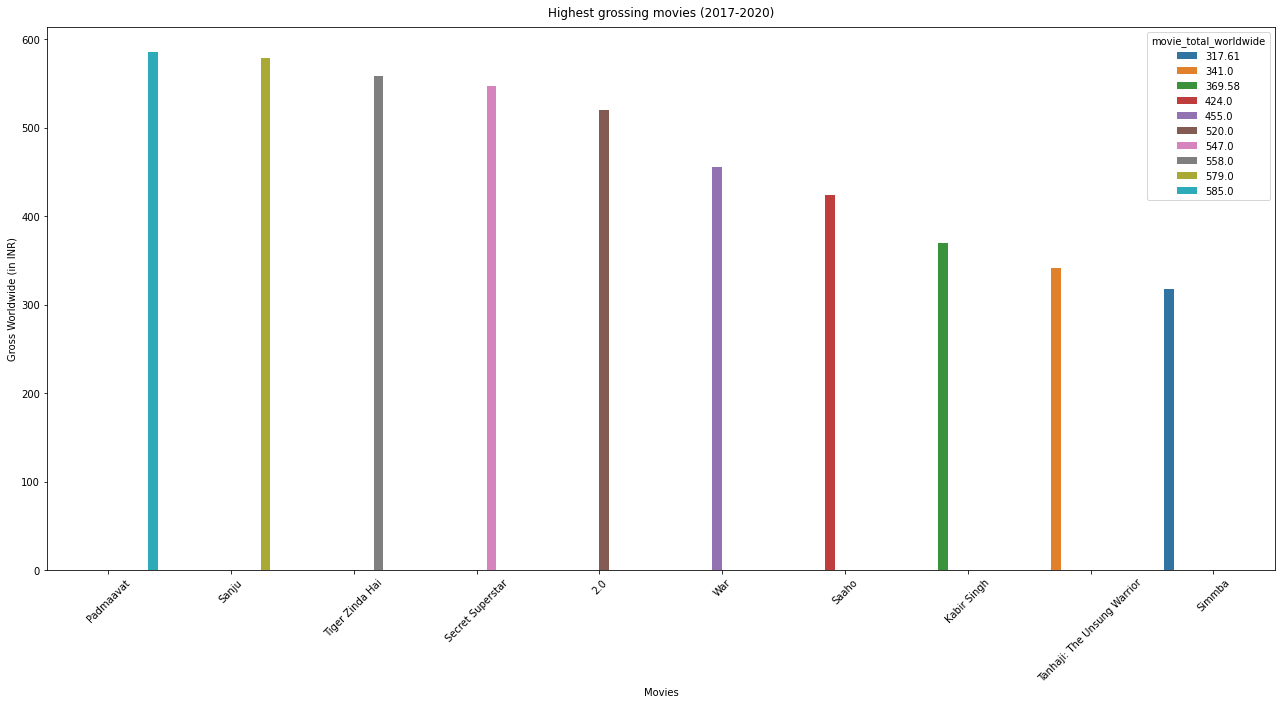

In [40]:
high_earning=data.sort_values('movie_total_worldwide', ascending = False)
high_earning=high_earning.head(10)
plt.figure(figsize=(22,10))
sns.barplot(y="movie_total_worldwide",x="movie_name",data=high_earning, hue="movie_total_worldwide")
plt.title('Highest grossing movies (2017-2020)', loc='center', pad=10)
plt.xticks(rotation=45)
plt.xlabel("Movies")
plt.ylabel("Gross Worldwide (in INR)")
plt.show()
# fig =px.bar(high_earning, y="movie_total_worldwide",x="movie_name",title="Top 10 Highest Box Office Collections ",color="movie_name", labels={'movie_name':"movies", "movie_total_worldwide":"Gross Worldwide"})
# HTML(fig.to_html())


## genre liked by the audience

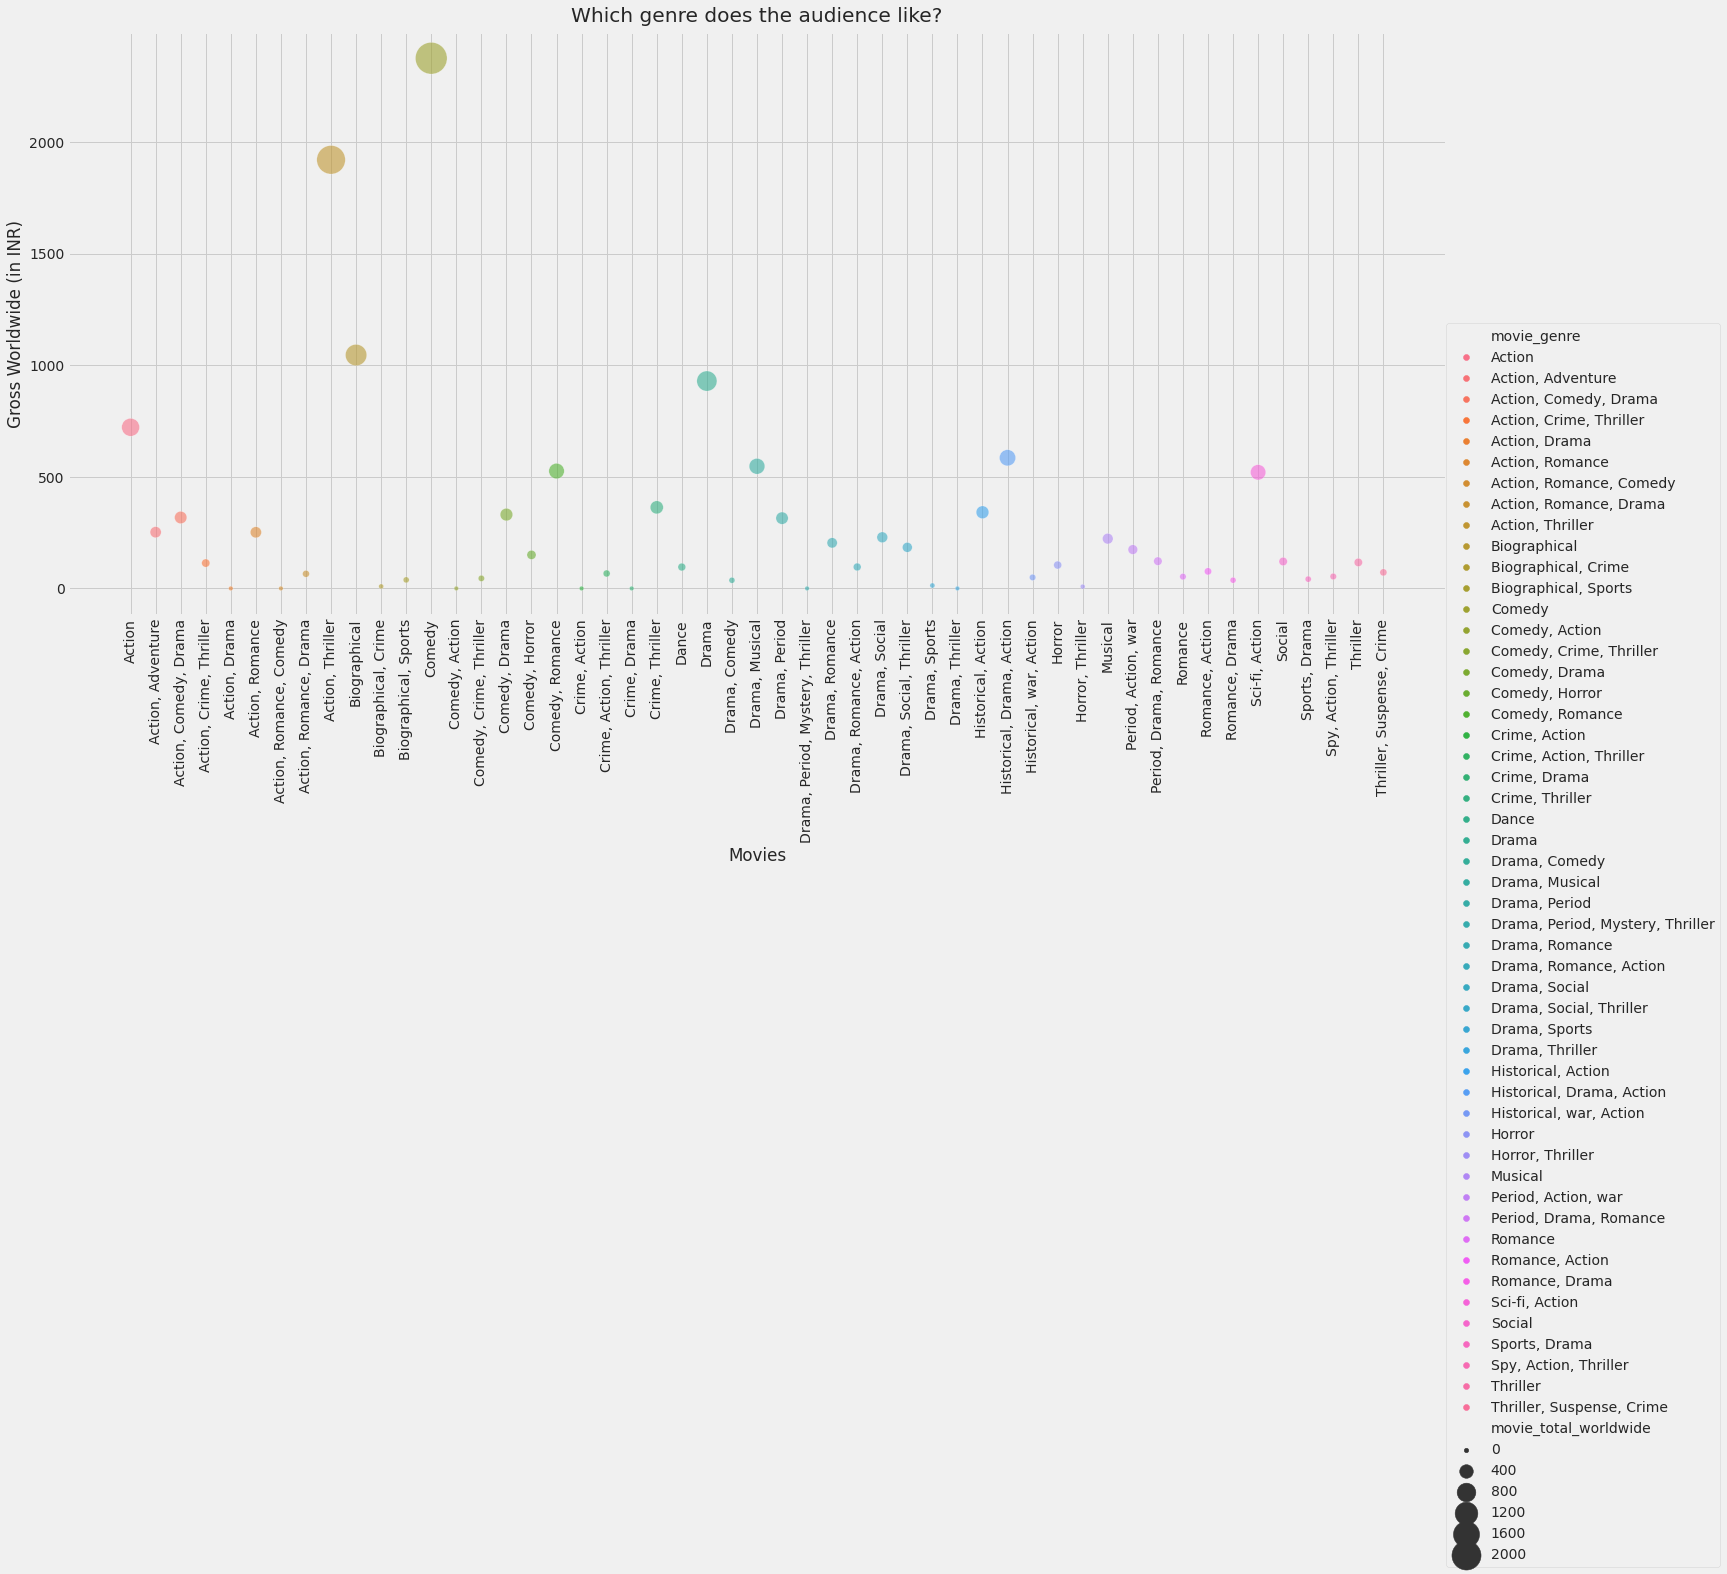

In [61]:
topgenre = data.groupby(["movie_genre"])["movie_total_worldwide"].sum().reset_index()
plt.figure(figsize=(22,10))
sns.scatterplot(x="movie_genre",y="movie_total_worldwide",size= "movie_total_worldwide", hue="movie_genre",data=topgenre,alpha=0.6,sizes=(20, 1000))
plt.xticks(rotation='vertical')
plt.title('Which genre does the audience like?', loc='center', pad=10)
plt.xlabel("Movies")
plt.legend(loc=2, bbox_to_anchor=(1, 0.5), borderaxespad=0)
plt.ylabel("Gross Worldwide (in INR)")
plt.show()
# fig = px.scatter(topgenre,'movie_genre','movie_total_worldwide',size="movie_total_worldwide",color="movie_genre",title="Which Genre is most liked by Audience")
# HTML(fig.to_html())

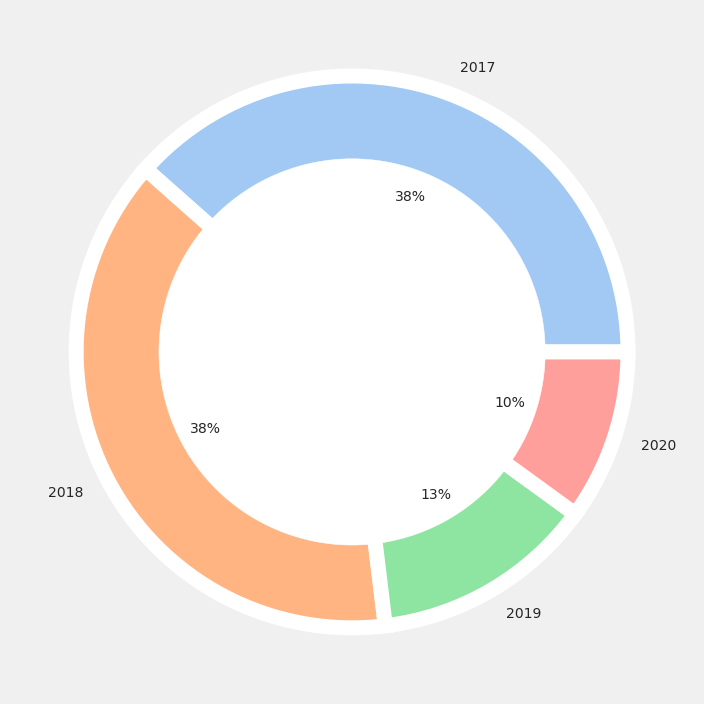

In [62]:
years=data["release_year"].value_counts().to_list()
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(18,10))
my_circle = plt.Circle( (0,0), 0.7, color='white')
labels=[2017, 2018, 2019, 2020]
plt.pie(years,labels=labels,colors = colors, autopct='%.0f%%', wedgeprops = { 'linewidth' : 15, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.show()

# fig = px.pie(data,'release_year','movie_total_worldwide',title="In Which Year Most Profit Collected")
# HTML(fig.to_html())

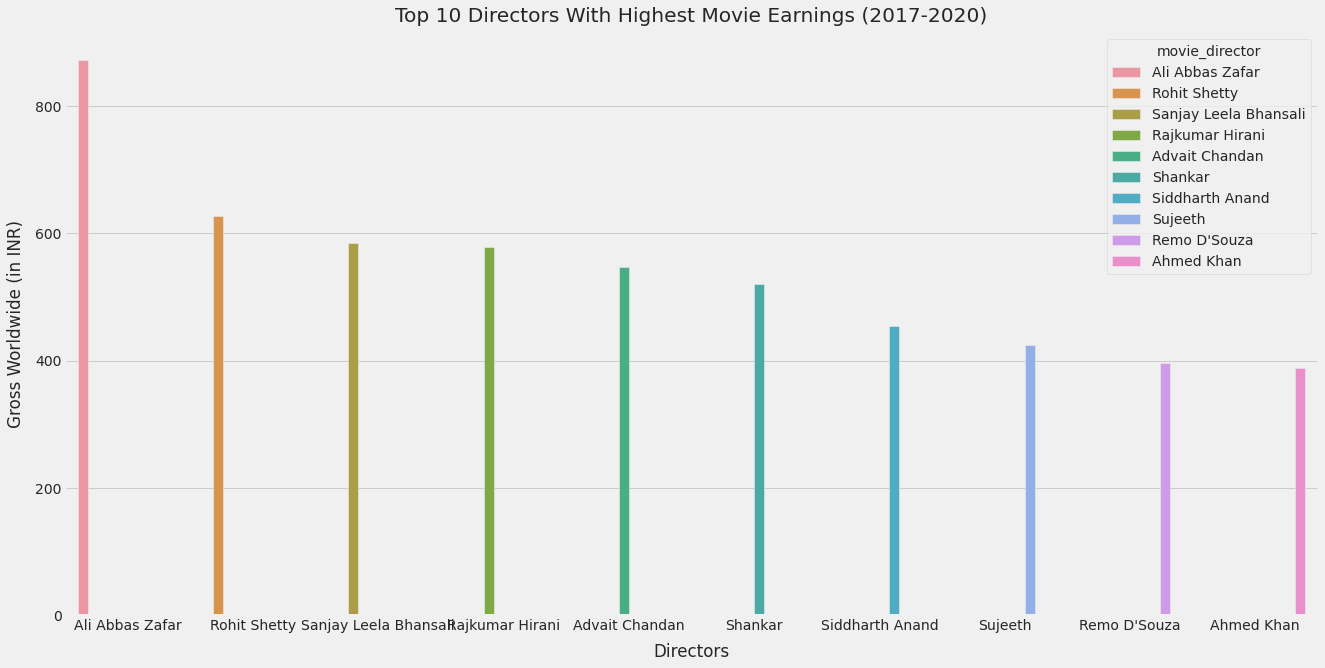

In [59]:
topdir = data.groupby(["movie_director"])["movie_total_worldwide"].sum().reset_index()
topdir=topdir.sort_values("movie_total_worldwide",ascending=False)
topdir=topdir.head(10)

plt.figure(figsize=(20,10))
sns.barplot(y="movie_total_worldwide",x="movie_director",data=topdir, hue="movie_director")
plt.title('Top 10 Directors With Highest Movie Earnings (2017-2020)', loc='center', pad=10)
# plt.xticks(rotation=60)
plt.xlabel("Directors", labelpad=10)
plt.ylabel("Gross Worldwide (in INR)", labelpad=10)
plt.show()


# fig = px.bar(topdir,"movie_director","movie_total_worldwide",title="Top 10 Directors With Highest Movie Earnings ",color="movie_director")
# HTML(fig.to_html())

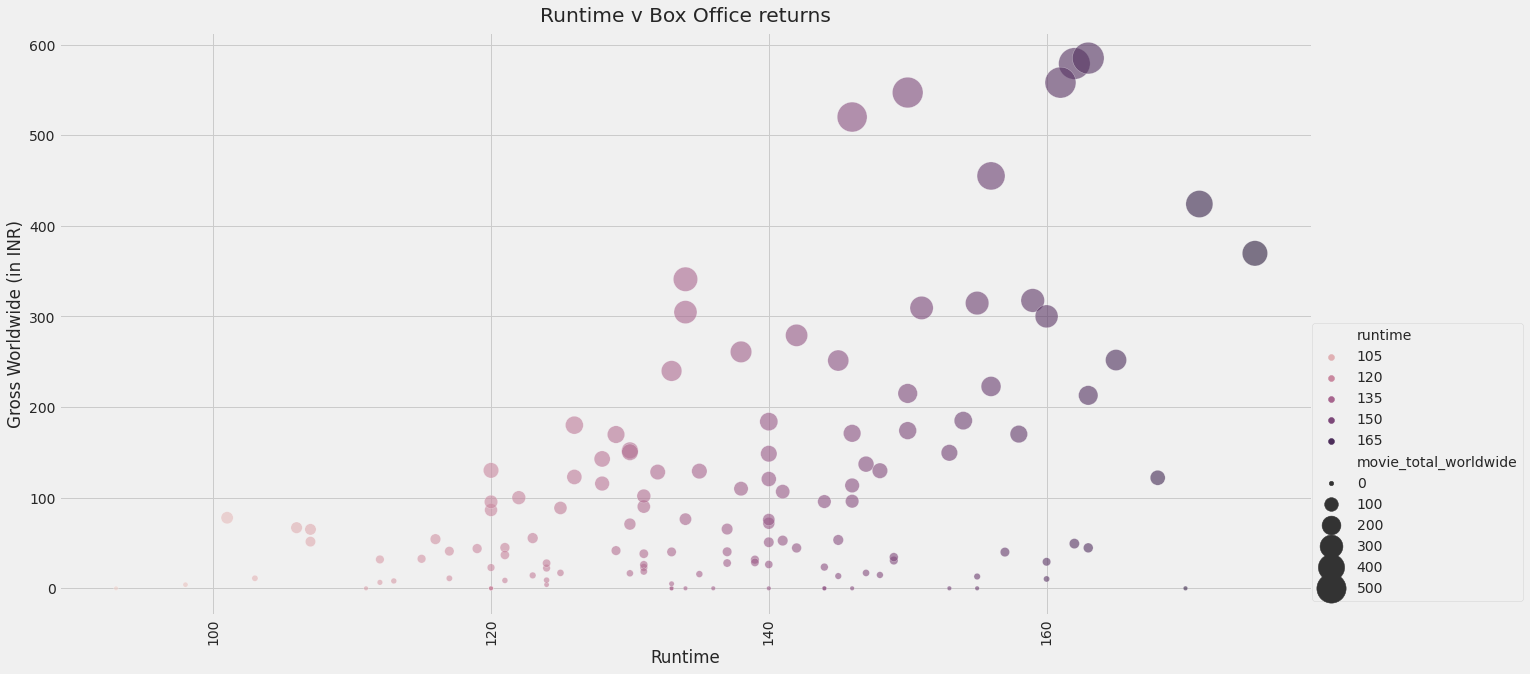

In [70]:


plt.figure(figsize=(20,10))
sns.scatterplot(x="runtime",y="movie_total_worldwide",size="movie_total_worldwide", hue="runtime",data=data,alpha=0.6,sizes=(20, 1000))
plt.xticks(rotation='vertical')
plt.title('Runtime v Box Office returns', loc='center', pad=10)
plt.xlabel("Runtime")
plt.legend(loc=2, bbox_to_anchor=(1, 0.5), borderaxespad=0)
plt.ylabel("Gross Worldwide (in INR)")
plt.show()


# fig = px.scatter(data, x="runtime", y="movie_total_worldwide", color="release_year",
#                  size='movie_total_worldwide')
# HTML(fig.to_html())

Text(0.5, 1.0, 'Domestic Gross of Indian Movies by Month')

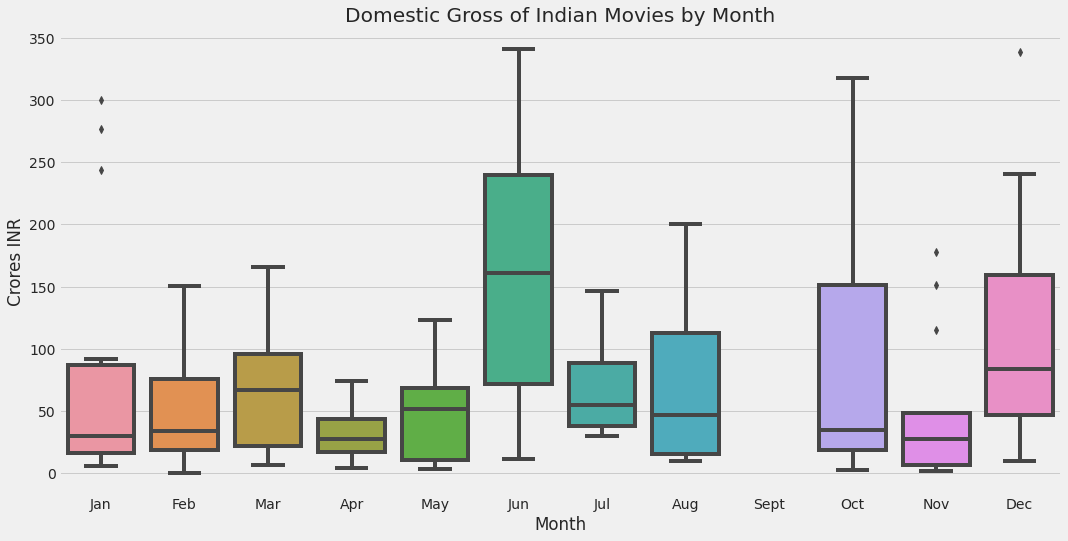

In [45]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
          "Aug", "Sept", "Oct", "Nov", "Dec"]
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (16, 8))
sns.boxplot(x = "release_month", y = "movie_total", data = data, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Domestic Gross of Indian Movies by Month")

Text(0.5, 1.0, 'Worldwide Gross of Indian Movies by Month')

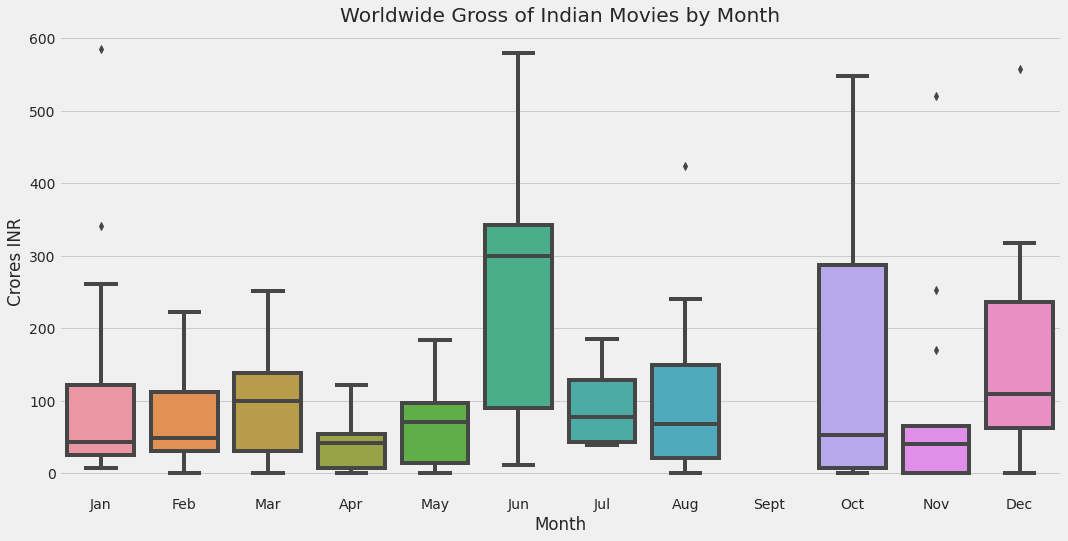

In [46]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (16, 8))
sns.boxplot(x = "release_month", y = "movie_total_worldwide", data = data, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Worldwide Gross of Indian Movies by Month")